# Instalaciones necesarias

In [ ]:
pip install h2o

In [ ]:
pip install scorecardpy

In [ ]:
import h2o
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import scorecardpy as sc
import scipy.stats as stats
from scipy.stats import mannwhitneyu

from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators import H2ONaiveBayesEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.automl import H2OAutoML

In [ ]:
h2o.init(max_mem_size="4G")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkdk8qc90
  JVM stdout: /tmp/tmpkdk8qc90/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkdk8qc90/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_0uuy7l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Información del Dataset

Para este trabajo se ha utilizado el dataset **`heart_2020_cleaned.csv`**, el cual contiene información proveniente del sistema de vigilancia de factores de riesgo del comportamiento en EE.UU. (Behavioral Risk Factor Surveillance System – BRFSS). Este conjunto de datos recoge información relacionada con la salud física y los estilos de vida de más de 300,000 adultos estadounidenses, y ha sido limpiado previamente para facilitar su análisis.

A continuación, se resumen las principales características del dataset:

- **Cantidad de registros**: 319,795 personas  
- **Cantidad de variables**: 18 columnas (17 predictoras + 1 objetivo)

### Variables incluidas:

| Variable           | Descripción                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| `HeartDisease`     | **Variable objetivo**: Si la persona ha sido diagnosticada con enfermedad cardíaca (Yes/No) |
| `BMI`              | Índice de masa corporal                                                     |
| `Smoking`          | Si la persona fuma actualmente                                              |
| `AlcoholDrinking`  | Si la persona consume alcohol en exceso                                     |
| `Stroke`           | Si la persona ha tenido un derrame cerebral                                 |
| `PhysicalHealth`   | Número de días con salud física no buena en los últimos 30 días             |
| `MentalHealth`     | Número de días con salud mental no buena en los últimos 30 días             |
| `DiffWalking`      | Si la persona tiene dificultad para caminar o subir escaleras               |
| `Sex`              | Género (Male / Female)                                                      |
| `AgeCategory`      | Categoría de edad (por rangos: 18–24, 25–29, ..., 80+)                       |
| `Race`             | Raza o grupo étnico                                                         |
| `Diabetic`         | Si tiene diagnóstico de diabetes (Yes, No, Borderline, During pregnancy)    |
| `PhysicalActivity` | Si realiza actividad física fuera del trabajo                               |
| `GenHealth`        | Estado general de salud autoevaluado (Excellent, Very good, Good, Fair, Poor) |
| `SleepTime`        | Horas promedio de sueño por noche                                           |
| `Asthma`           | Si ha sido diagnosticado con asma                                           |
| `KidneyDisease`    | Si ha sido diagnosticado con enfermedad renal                               |
| `SkinCancer`       | Si ha sido diagnosticado con cáncer de piel                                 |

Este conjunto de datos permite realizar un análisis profundo sobre cómo diversos factores relacionados al estilo de vida, condiciones médicas previas y variables sociodemográficas pueden influir en el riesgo de padecer enfermedades cardíacas. Dado su tamaño y riqueza de atributos, es ideal para aplicar modelos de aprendizaje supervisado en plataformas de Big Data como H2O.

---


# Carga de datos

In [ ]:
#Carga de datos
data_h2o = h2o.import_file(
    path = 'heart_2020_cleaned.csv',
    header = 1,
    sep = ",",
    destination_frame = "datos_h2o")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Exploración de datos

In [ ]:
data_h2o.head(10)

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
No,16.6,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [ ]:
data_h2o.describe()

Rows:319795
Cols:18

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
type,enum,real,enum,enum,enum,int,int,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum
mins,,12.02,,,,0.0,0.0,,,,,,,,1.0,,,
mean,,28.325398520927447,,,,3.3717100017198582,3.8983661408089545,,,,,,,,7.097074688472302,,,
maxs,,94.85,,,,30.0,30.0,,,,,,,,24.0,,,
sigma,,6.356100200470739,,,,7.950850182571358,7.955235218943607,,,,,,,,1.4360070609642828,,,
zeros,,0,,,,226589,205401,,,,,,,,0,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [ ]:
data_h2o.summary()

/tmp/ipython-input-48-953057791.py:1: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  data_h2o.summary()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
type,enum,real,enum,enum,enum,int,int,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum
mins,,12.02,,,,0.0,0.0,,,,,,,,1.0,,,
mean,,28.325398520927447,,,,3.3717100017198582,3.8983661408089545,,,,,,,,7.097074688472302,,,
maxs,,94.85,,,,30.0,30.0,,,,,,,,24.0,,,
sigma,,6.356100200470739,,,,7.950850182571358,7.955235218943607,,,,,,,,1.4360070609642828,,,
zeros,,0,,,,226589,205401,,,,,,,,0,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [ ]:
data_h2o.types

{'HeartDisease': 'enum',
 'BMI': 'real',
 'Smoking': 'enum',
 'AlcoholDrinking': 'enum',
 'Stroke': 'enum',
 'PhysicalHealth': 'int',
 'MentalHealth': 'int',
 'DiffWalking': 'enum',
 'Sex': 'enum',
 'AgeCategory': 'enum',
 'Race': 'enum',
 'Diabetic': 'enum',
 'PhysicalActivity': 'enum',
 'GenHealth': 'enum',
 'SleepTime': 'int',
 'Asthma': 'enum',
 'KidneyDisease': 'enum',
 'SkinCancer': 'enum'}

In [ ]:
data_h2o['HeartDisease'] = data_h2o['HeartDisease'].asfactor()

In [ ]:
#Convierte el H2OFrame a pandas.DataFrame
df = data_h2o.as_data_frame(use_multi_thread=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


# Variables numéricas

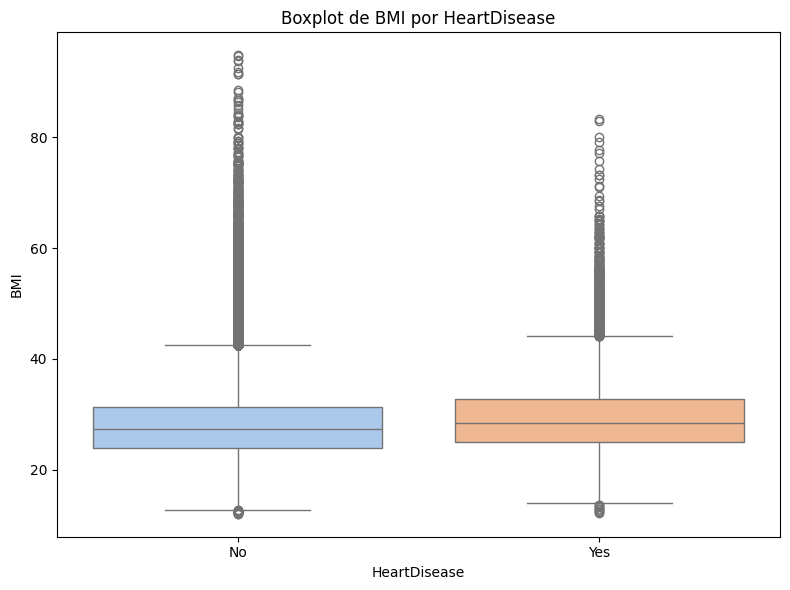

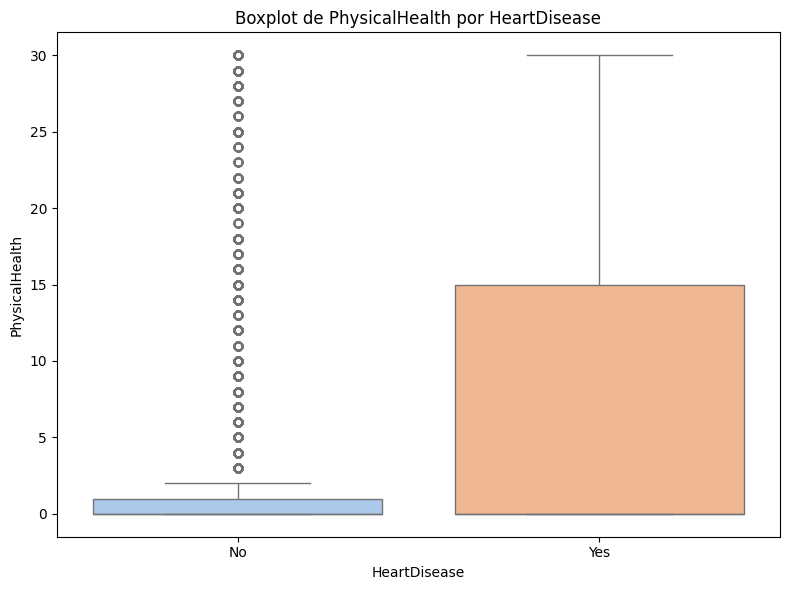

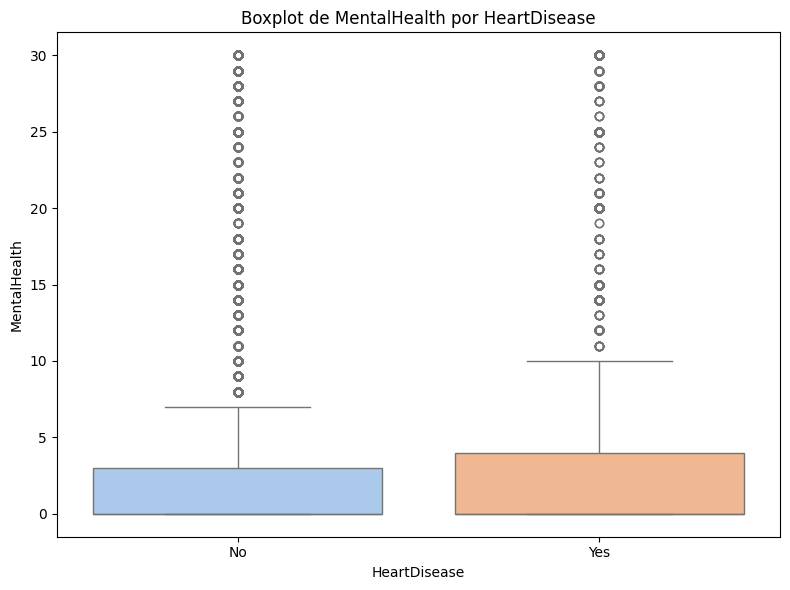

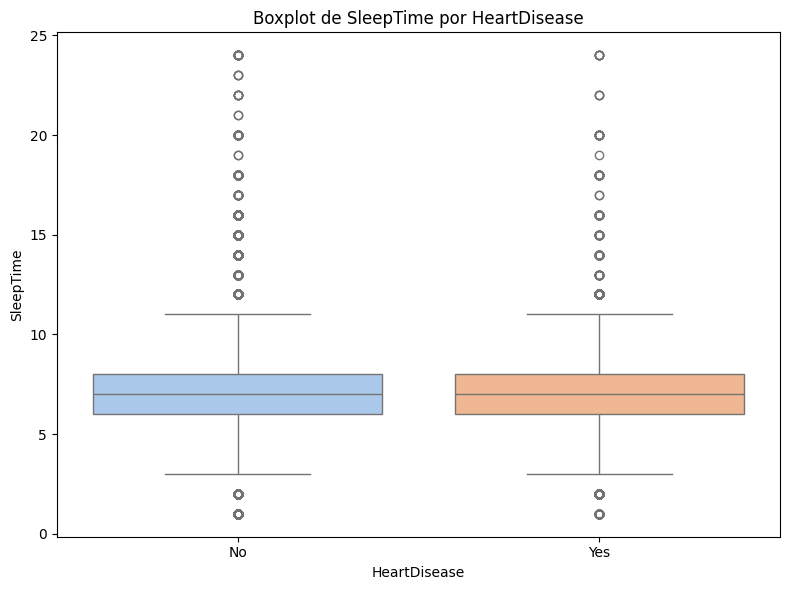

In [ ]:
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='HeartDisease', y=col, hue='HeartDisease', palette='pastel', dodge=False)
    plt.title(f'Boxplot de {col} por HeartDisease')
    plt.xlabel('HeartDisease')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

- **BMI (Índice de masa corporal):** Las personas con enfermedad cardíaca tienden a tener un BMI ligeramente más alto en promedio, aunque ambas distribuciones presentan valores atípicos.
- **PhysicalHealth:** Se aprecia una diferencia muy marcada. Las personas con enfermedad cardíaca reportan más días de mala salud física, lo cual sugiere una fuerte relación con la condición.
- **MentalHealth:** Aunque la mediana es similar en ambos grupos, los valores atípicos son más numerosos entre quienes no presentan enfermedad cardíaca.
- **SleepTime:** No se observa una diferencia significativa en las horas de sueño promedio entre ambos grupos, aunque hay una ligera tendencia a que las personas sin enfermedad cardíaca duerman más horas.


In [ ]:
for col in num_cols:
    test_res = ss.shapiro(df[col])
    if test_res[1] > 0.05:
        print(f"La distribución de {col} es normal")
    else:
        print(f"La distribución de {col} no es normal")

La distribución de BMI no es normal
La distribución de PhysicalHealth no es normal
La distribución de MentalHealth no es normal
La distribución de SleepTime no es normal


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 319795.
  res = hypotest_fun_out(*samples, **kwds)


Homogeneidad de varianzas

In [ ]:
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

results = []

for col in num_cols:
    data0 = df.loc[df['HeartDisease'] == 'No', col].dropna()
    data1 = df.loc[df['HeartDisease'] == 'Yes', col].dropna()

    if len(data0) < 3 or len(data1) < 3:
        results.append({
            'variable': col,
            'Levene_p': None,
            'Bartlett_p': None,
            'Fligner_p': None
        })
        continue

    stat_lev, p_lev = stats.levene(data0, data1, center='median')
    stat_bar, p_bar = stats.bartlett(data0, data1)
    stat_flg, p_flg = stats.fligner(data0, data1)

    results.append({
        'variable': col,
        'Levene_p': p_lev,
        'Bartlett_p': p_bar,
        'Fligner_p': p_flg
    })

df_homogeneidad = pd.DataFrame(results)
print(df_homogeneidad)

         variable      Levene_p     Bartlett_p     Fligner_p
0             BMI  4.262711e-13   1.170904e-18  7.070444e-14
1  PhysicalHealth  0.000000e+00   0.000000e+00  0.000000e+00
2    MentalHealth  8.023875e-59  1.355814e-300  9.394017e-07
3       SleepTime  0.000000e+00   0.000000e+00  0.000000e+00


Se aplicaron las pruebas de Levene, Bartlett y Fligner–Killeen para evaluar la homogeneidad de varianzas entre los grupos con y sin enfermedades cardíacas respecto a las variables numéricas BMI, PhysicalHealth, MentalHealth y SleepTime. En todos los casos, los valores p obtenidos fueron significativamente menores a 0.05, lo que indica que se rechaza la hipótesis nula de igualdad de varianzas.

In [ ]:
from scipy.stats import kruskal
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    groups = [group[col].dropna() for name, group in df.groupby('HeartDisease')]
    stat, pval = kruskal(*groups)
    print(f"{col}: H={stat:.2f}, p-value={pval:.4f}")

BMI: H=1051.99, p-value=0.0000
PhysicalHealth: H=6545.36, p-value=0.0000
MentalHealth: H=3.79, p-value=0.0514
SleepTime: H=18.09, p-value=0.0000


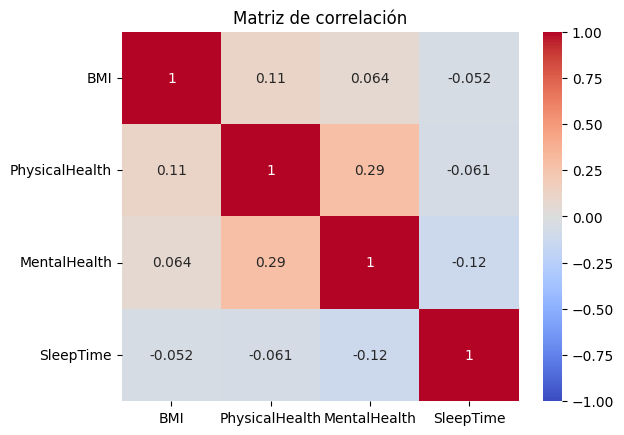

In [ ]:
numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

La matriz de correlación muestra que las relaciones entre las variables numéricas del dataset son en general **débiles**. La correlación más alta se observa entre PhysicalHealth y MentalHealth (0.29), lo cual tiene sentido, ya que una peor salud física puede asociarse a un mayor deterioro del bienestar mental. El BMI presenta una correlación leve y positiva con PhysicalHealth (0.11), mientras que SleepTime se correlaciona débilmente y de forma negativa con las demás variables, siendo su relación más notable con MentalHealth (-0.12). En conjunto, estos valores sugieren que no existe colinealidad fuerte entre las variables numéricas, lo cual es positivo para la aplicación de modelos de aprendizaje automático, ya que evita redundancias.

# Variables categoricas

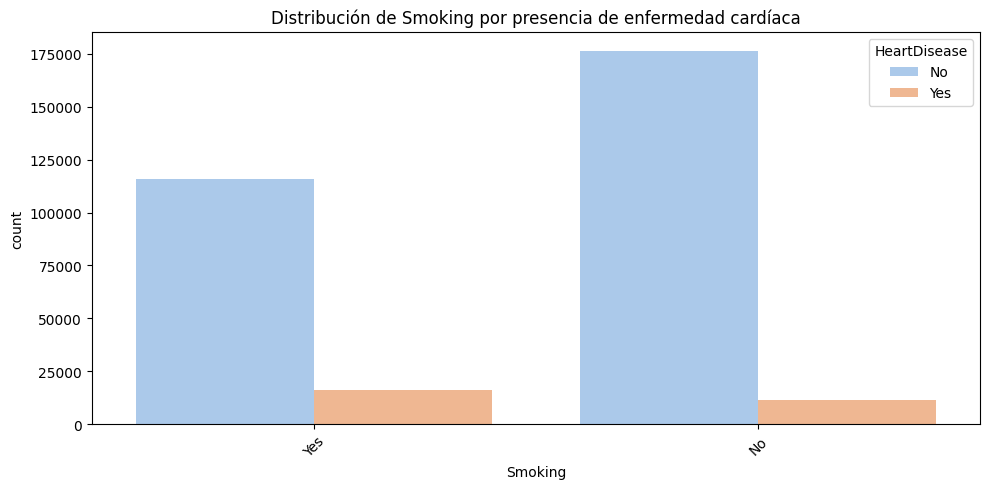

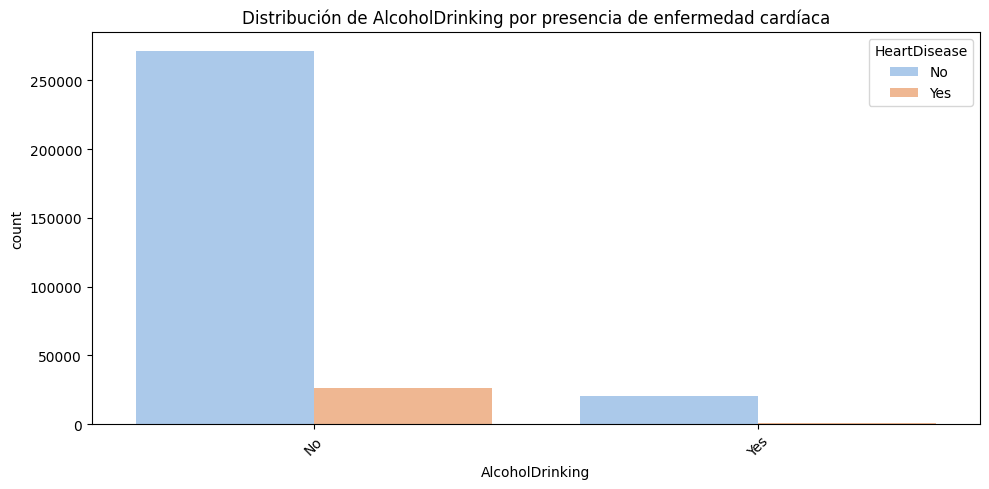

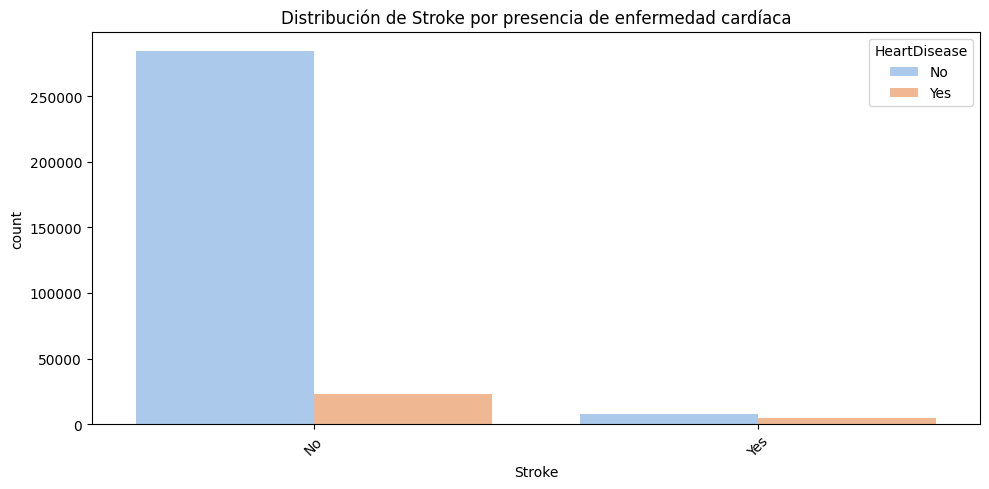

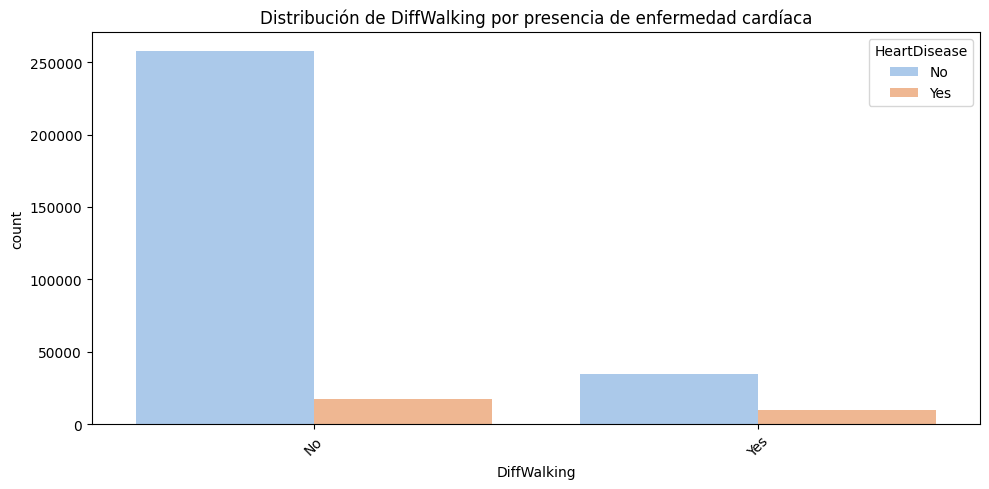

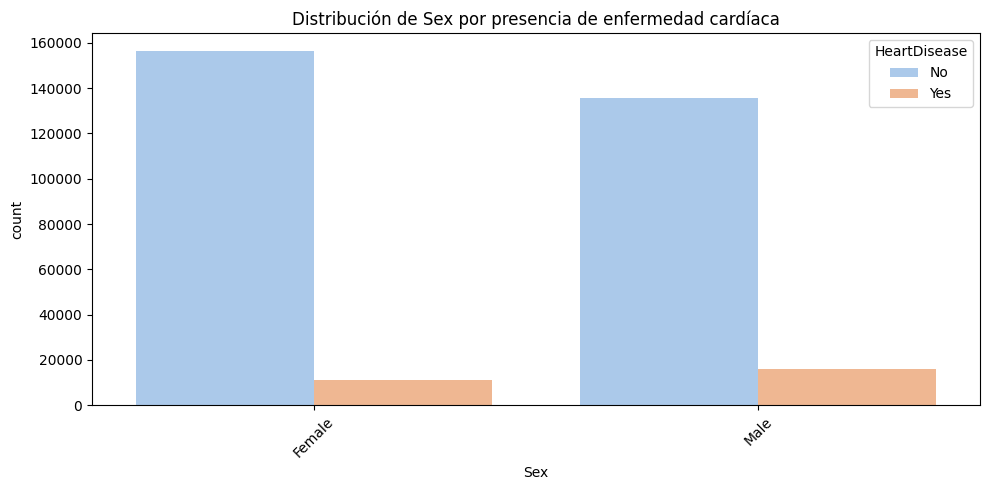

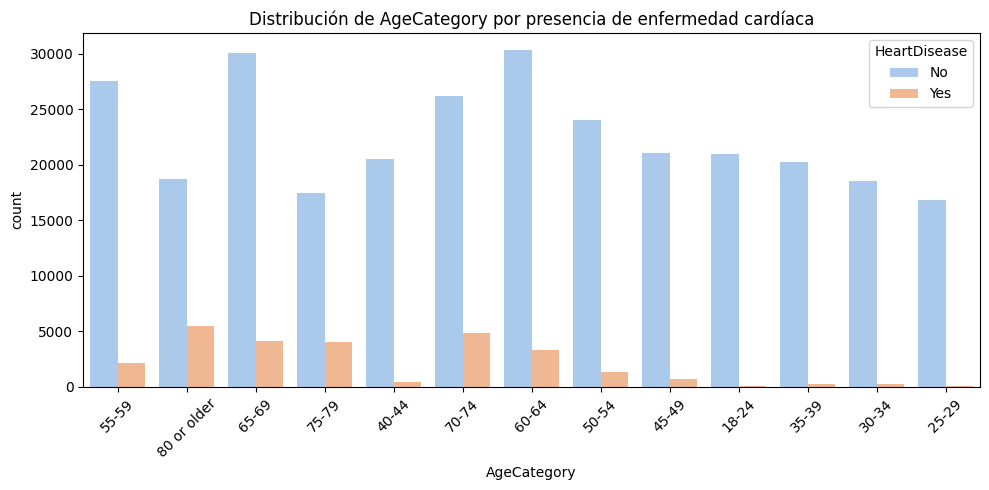

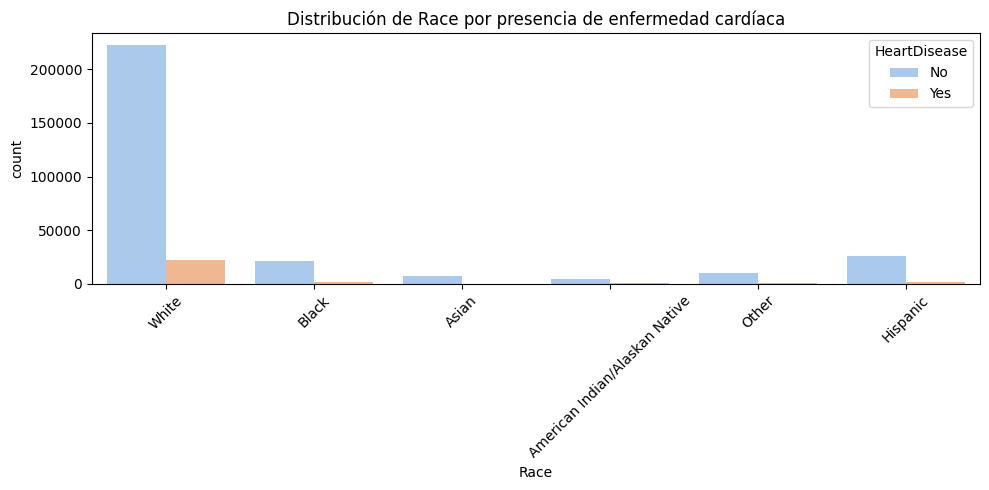

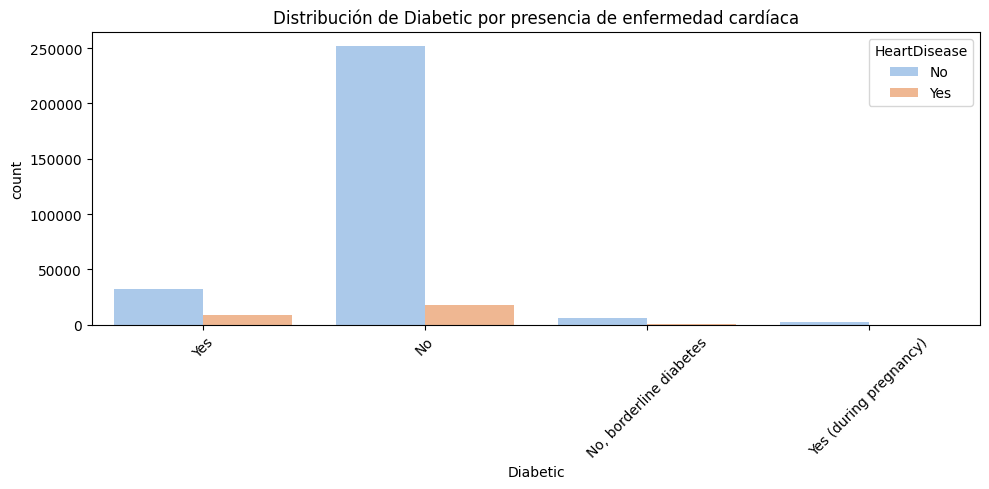

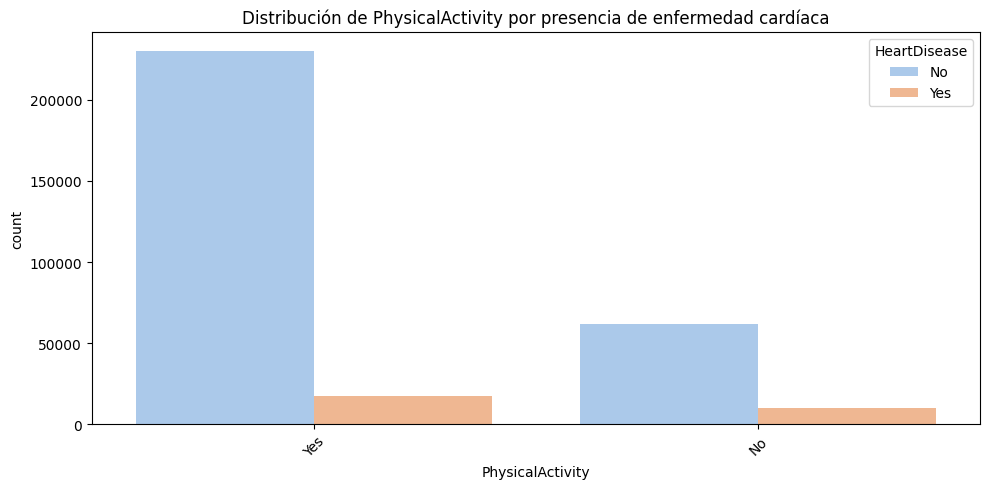

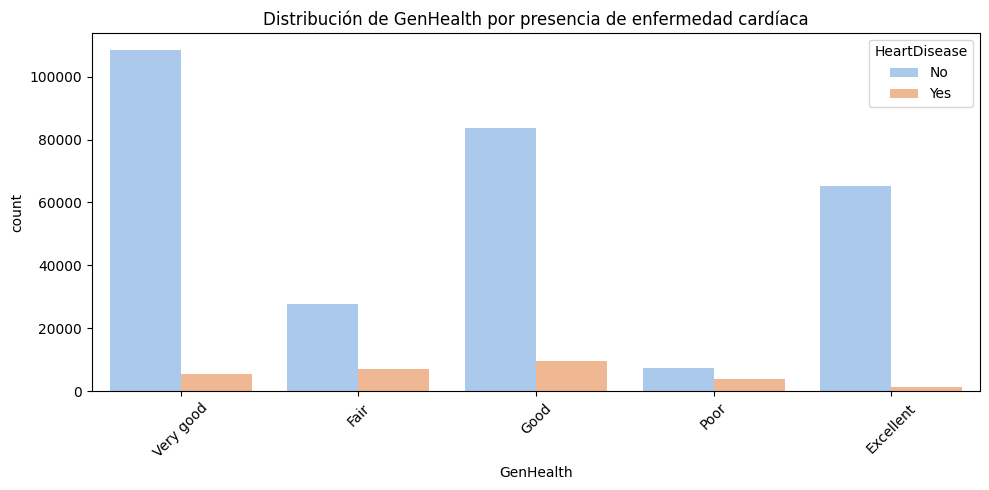

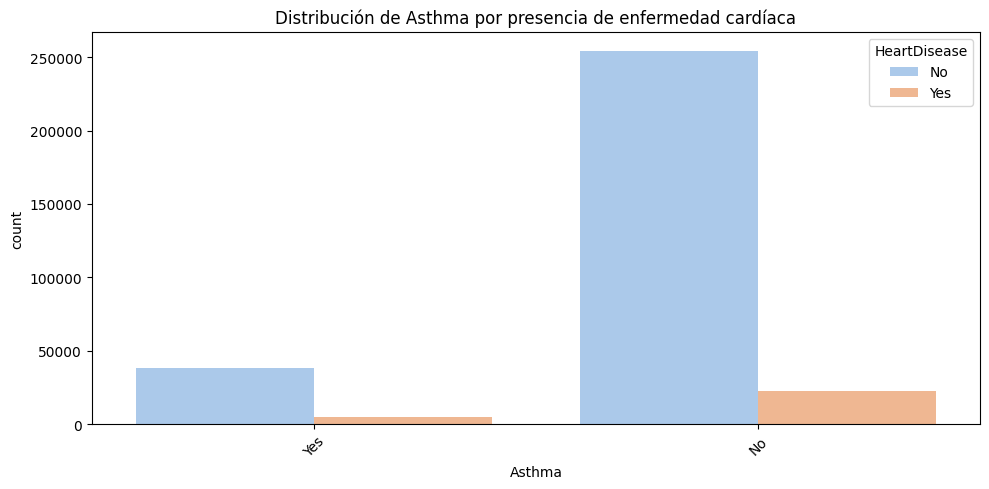

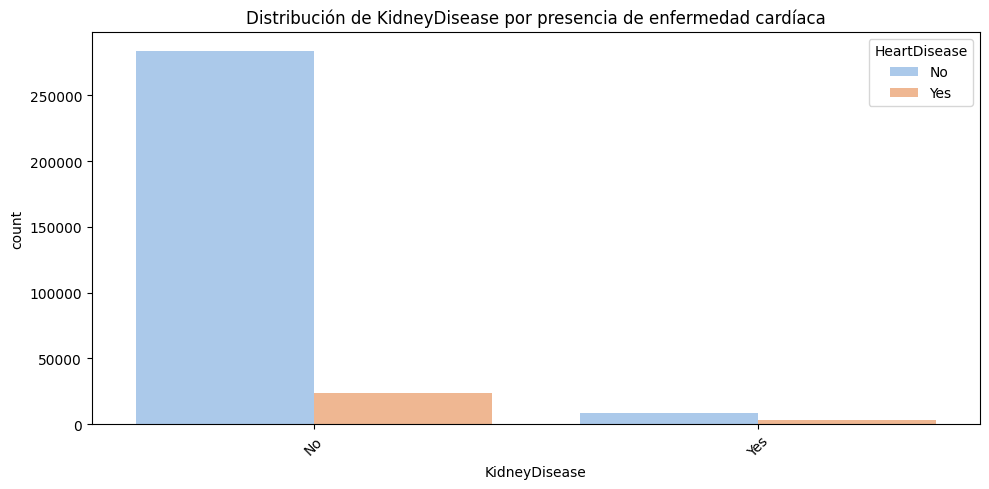

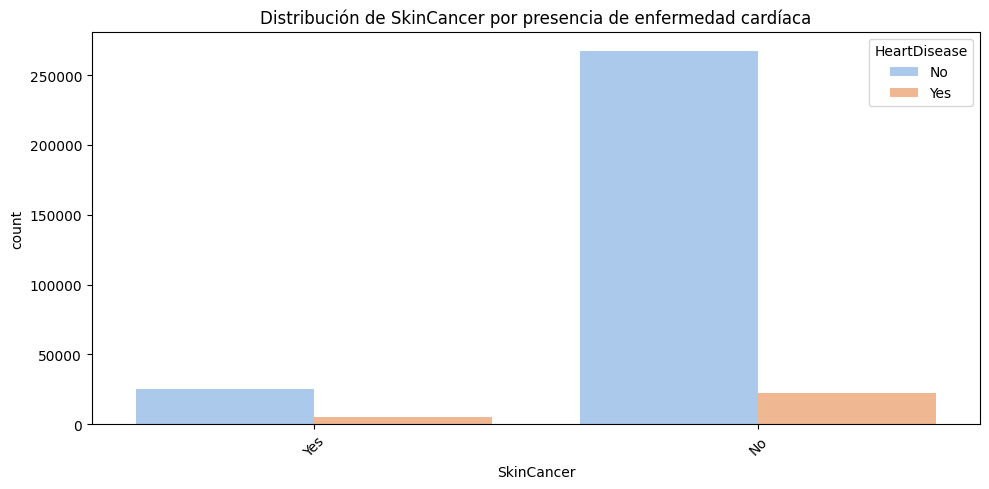

In [ ]:
cat_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
            'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
            'KidneyDisease', 'SkinCancer']

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='HeartDisease', palette='pastel')
    plt.title(f'Distribución de {col} por presencia de enfermedad cardíaca')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Al observar las variables categóricas, se identifican patrones relevantes que podrían influir en la presencia de enfermedad cardíaca. Por ejemplo, aunque el grupo de personas que no fuma es mayoritario, la proporción de personas con enfermedad cardíaca es ligeramente más alta entre quienes sí fuman, lo que sugiere un posible vínculo entre el tabaquismo y el riesgo cardiovascular. En cuanto al consumo excesivo de alcohol, la mayoría de personas no lo reportan, pero entre los pocos que sí lo hacen, la proporción de enfermedades cardíacas también parece más elevada, aunque con menor impacto visual.

La variable Stroke (accidente cerebrovascular) muestra una clara asociación: quienes han sufrido un derrame tienen una mayor proporción de enfermedad cardíaca, lo cual es consistente con la literatura médica. Lo mismo se observa en DiffWalking, donde las personas que presentan dificultades para caminar tienen una mayor incidencia de enfermedad cardíaca.

Las variables categóricas analizadas revelan patrones consistentes con evidencia clínica: los hombres presentan una mayor proporción de enfermedad cardíaca que las mujeres, y la incidencia aumenta progresivamente con la edad, especialmente a partir de los 55 años. Las personas con diabetes, peor percepción de salud general (valores "Fair" o "Poor") o que no realizan actividad física también muestran mayor prevalencia de la condición. Estos hallazgos respaldan la relevancia de dichas variables como predictoras clave en la modelización con algoritmos de aprendizaje supervisado en H2O.


In [ ]:
from scipy.stats import chi2_contingency

for col in cat_cols:
    contingency = pd.crosstab(df[col], df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")


Smoking: p-value = 0.0000
AlcoholDrinking: p-value = 0.0000
Stroke: p-value = 0.0000
DiffWalking: p-value = 0.0000
Sex: p-value = 0.0000
AgeCategory: p-value = 0.0000
Race: p-value = 0.0000
Diabetic: p-value = 0.0000
PhysicalActivity: p-value = 0.0000
GenHealth: p-value = 0.0000
Asthma: p-value = 0.0000
KidneyDisease: p-value = 0.0000
SkinCancer: p-value = 0.0000


Se aplicó la prueba de Chi-cuadrado de independencia para evaluar la relación entre diversas variables categóricas y la presencia de enfermedad cardíaca. En todos los casos analizados, los valores p fueron menores a 0.0001, lo que indica que se rechaza la hipótesis nula de independencia. Esto significa que existe una asociación estadísticamente significativa entre la variable HeartDisease y cada una de las variables categóricas evaluadas

# Valor de la información

In [ ]:
print(df['HeartDisease'].unique())

['No' 'Yes']


[INFO] creating woe binning ...


/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.11/dist-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

Binning on 319795 rows and 18 columns in 00:00:18
            variable        IV
0        AgeCategory  0.907744
1          GenHealth  0.697244
2        DiffWalking  0.365109
3           Diabetic  0.301550
4     PhysicalHealth  0.262217
5            Smoking  0.145640
6   PhysicalActivity  0.110881
7         SkinCancer  0.084739
8          SleepTime  0.065311
9                Sex  0.063043
10               BMI  0.042516
11              Race  0.039170
12      MentalHealth  0.029601
13            Asthma  0.019602
14   AlcoholDrinking  0.016092
15            Stroke  0.000000
16     KidneyDisease  0.000000


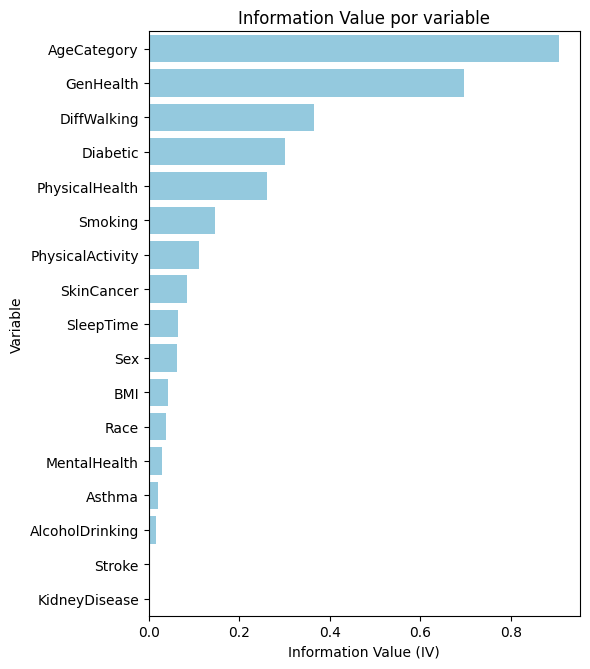

In [ ]:
import scorecardpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})

bins = sc.woebin(df, y='HeartDisease')

iv_dict = {}
for var, bdf in bins.items():
    if not bdf.empty:
        iv_value = bdf['total_iv'].iloc[0]
        iv_dict[var] = iv_value

iv_df = (
    pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
      .sort_values('IV', ascending=False)
      .reset_index()
      .rename(columns={'index': 'variable'})
)

print(iv_df)

plt.figure(figsize=(6, len(iv_df)*0.4))
sns.barplot(x='IV', y='variable', data=iv_df, color='skyblue')
plt.title("Information Value por variable")
plt.xlabel("Information Value (IV)")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Se observa que AgeCategory (IV = 0.91) y GenHealth (IV = 0.70) destacan como las variables más relevantes, con un poder predictivo muy alto. Le siguen DiffWalking, Diabetic y PhysicalHealth, con valores IV moderadamente altos, indicando que estas variables también contienen información útil para distinguir entre personas con y sin enfermedad cardíaca.

Por otro lado, variables como MentalHealth, Asthma, AlcoholDrinking, Stroke y KidneyDisease presentan valores IV cercanos a cero, lo que sugiere que tienen una capacidad discriminativa muy baja en este conjunto de datos. Estas podrían ser descartadas en etapas posteriores de modelado, especialmente si se busca simplificar el modelo sin pérdida significativa de rendimiento.


{'Diabetic': <Figure size 1200x600 with 2 Axes>,
 'SleepTime': <Figure size 1200x600 with 2 Axes>,
 'Asthma': <Figure size 1200x600 with 2 Axes>,
 'Stroke': <Figure size 1200x600 with 2 Axes>,
 'AgeCategory': <Figure size 1200x600 with 2 Axes>,
 'Race': <Figure size 1200x600 with 2 Axes>,
 'BMI': <Figure size 1200x600 with 2 Axes>,
 'PhysicalHealth': <Figure size 1200x600 with 2 Axes>,
 'Sex': <Figure size 1200x600 with 2 Axes>,
 'Smoking': <Figure size 1200x600 with 2 Axes>,
 'AlcoholDrinking': <Figure size 1200x600 with 2 Axes>,
 'SkinCancer': <Figure size 1200x600 with 2 Axes>,
 'GenHealth': <Figure size 1200x600 with 2 Axes>,
 'MentalHealth': <Figure size 1200x600 with 2 Axes>,
 'DiffWalking': <Figure size 1200x600 with 2 Axes>,
 'KidneyDisease': <Figure size 1200x600 with 2 Axes>,
 'PhysicalActivity': <Figure size 1200x600 with 2 Axes>}

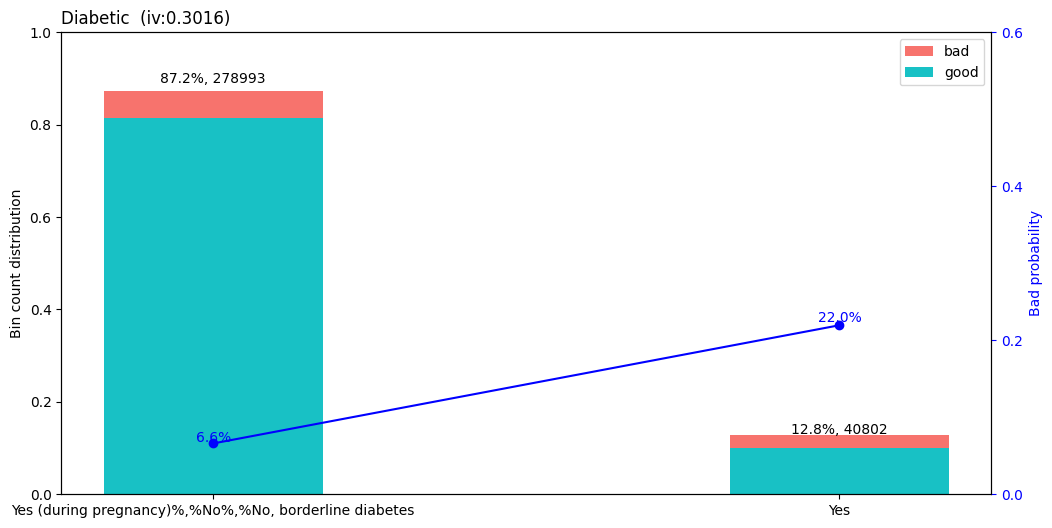

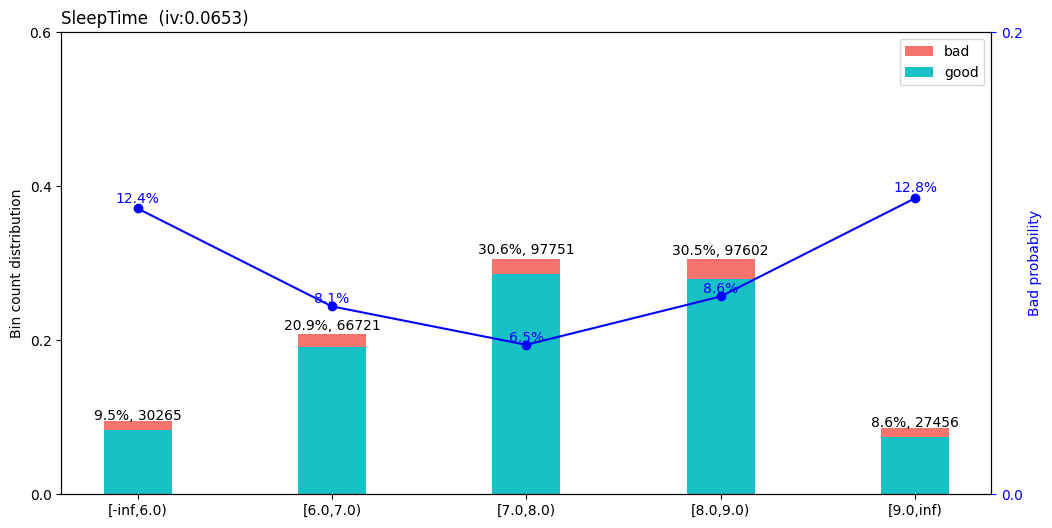

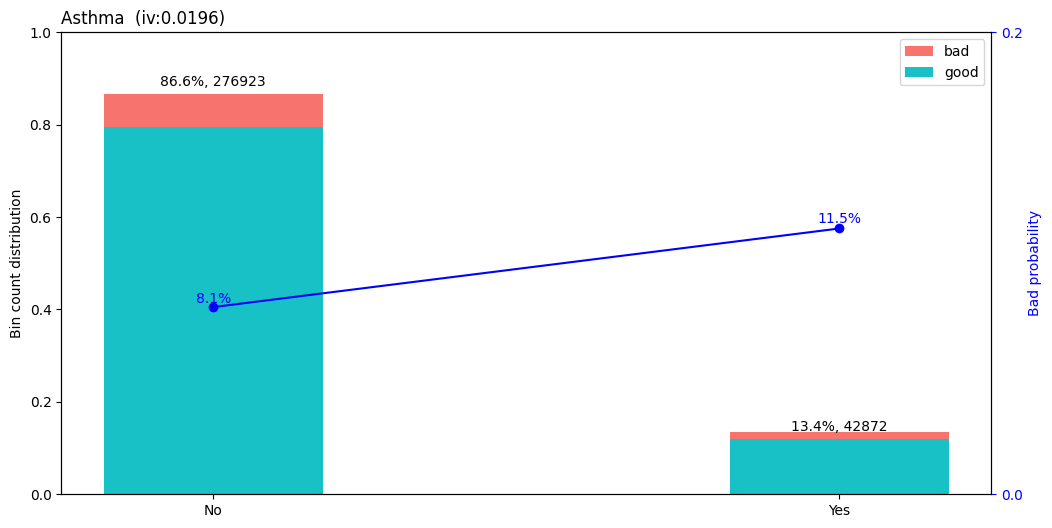

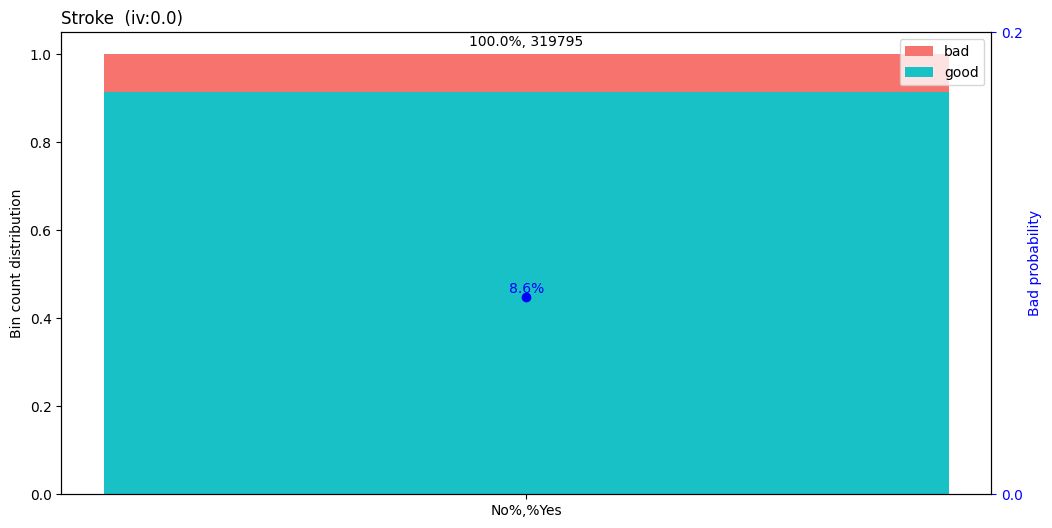

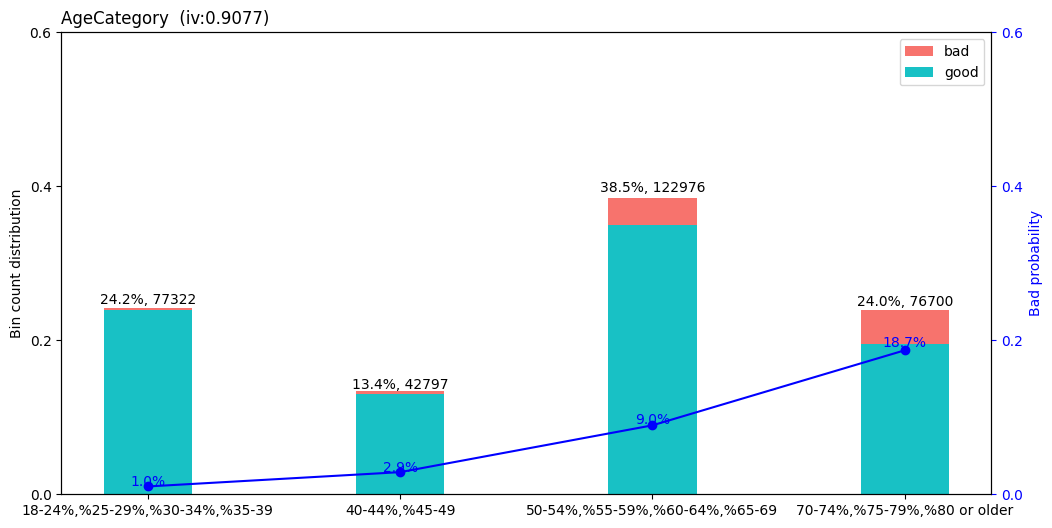

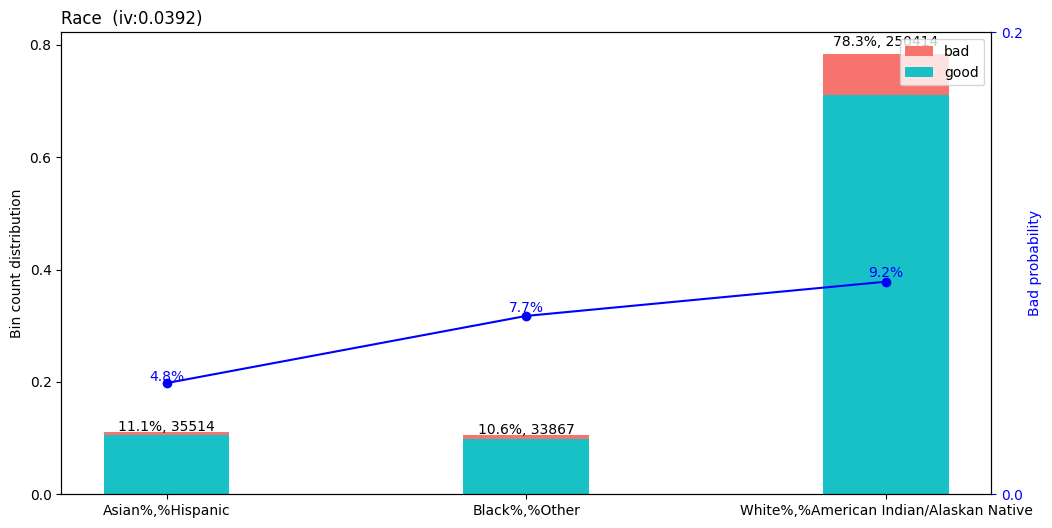

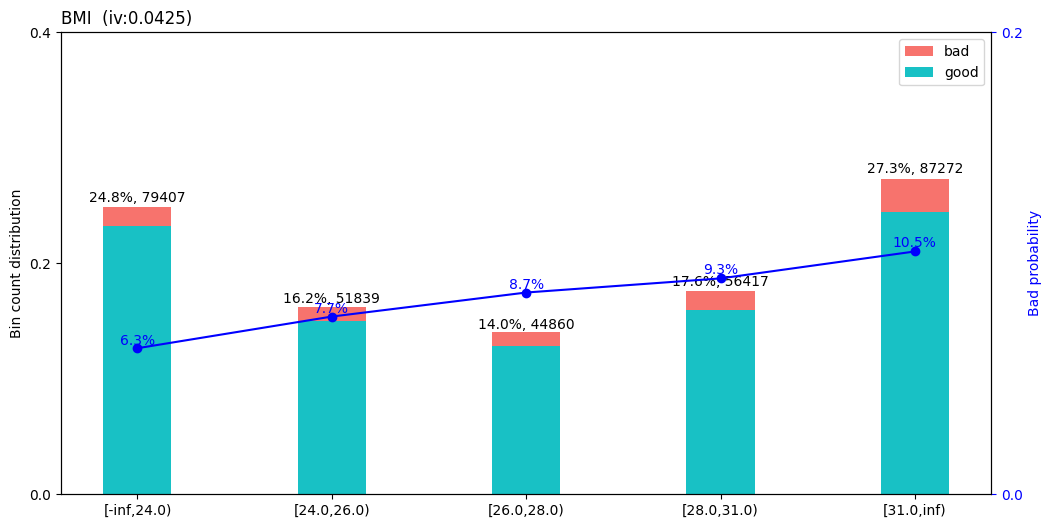

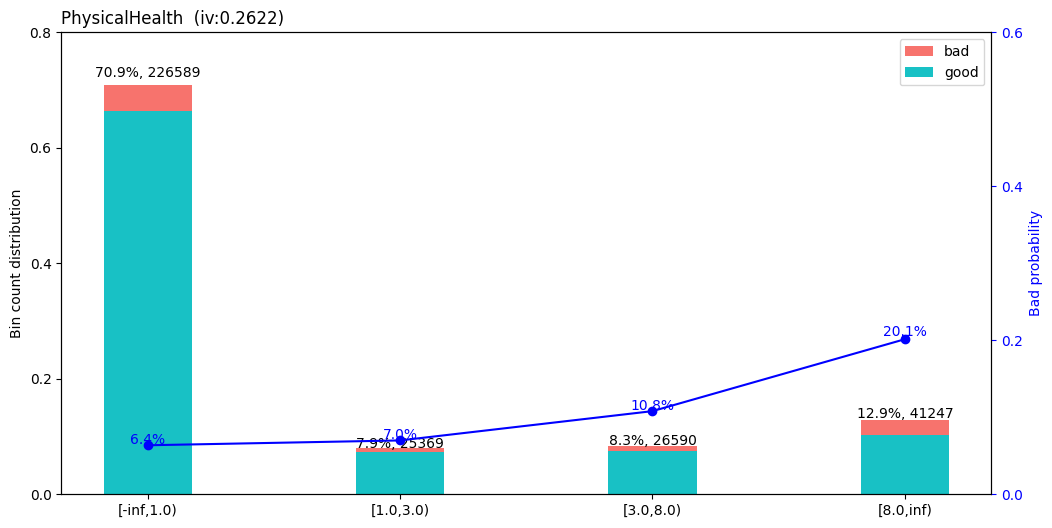

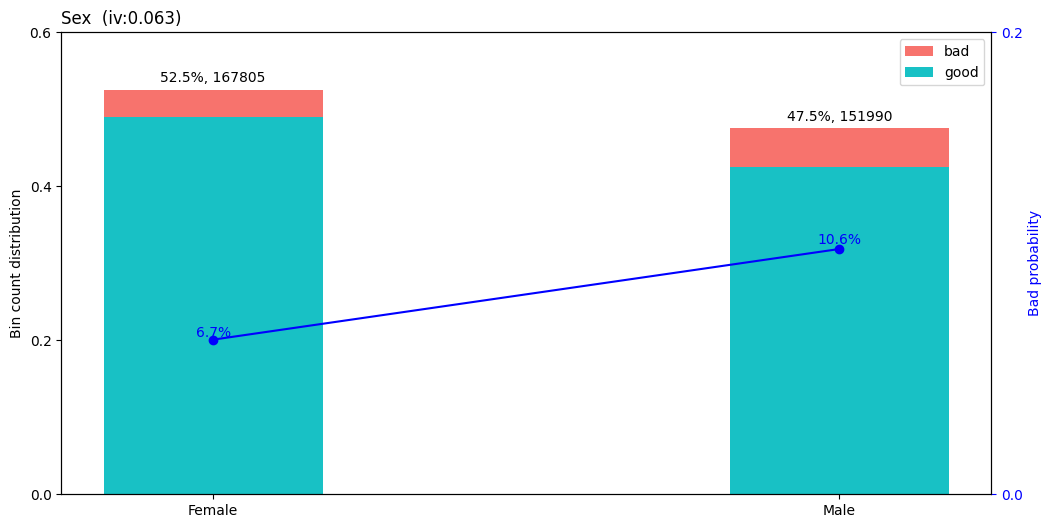

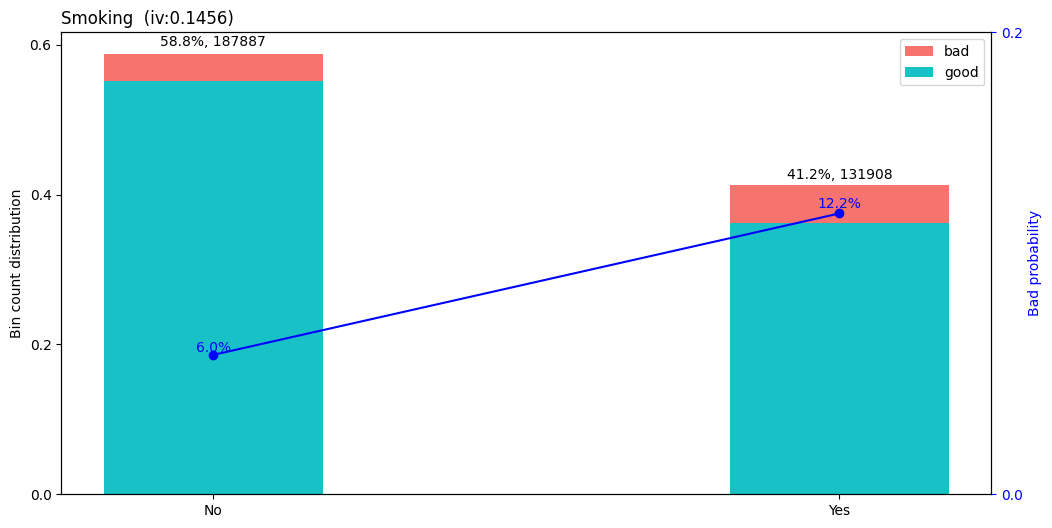

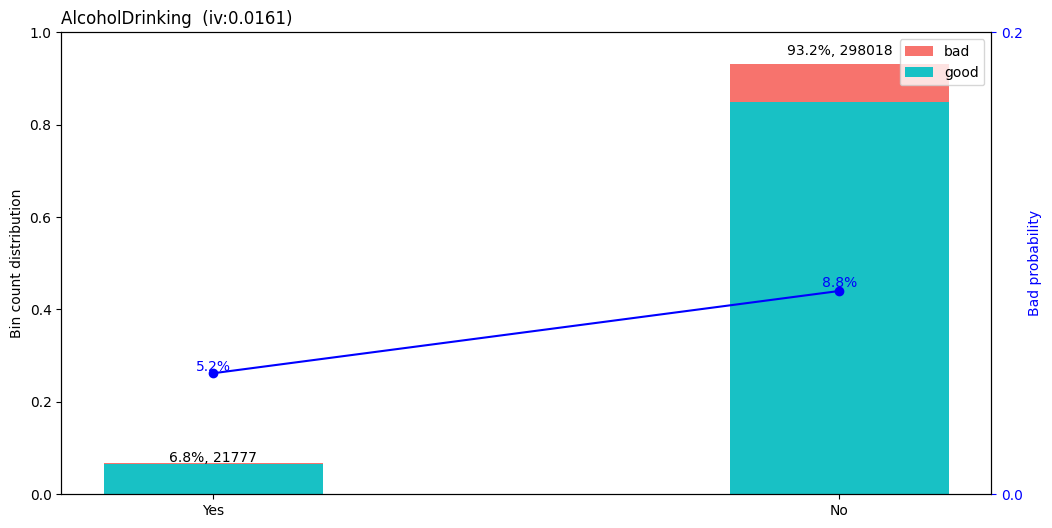

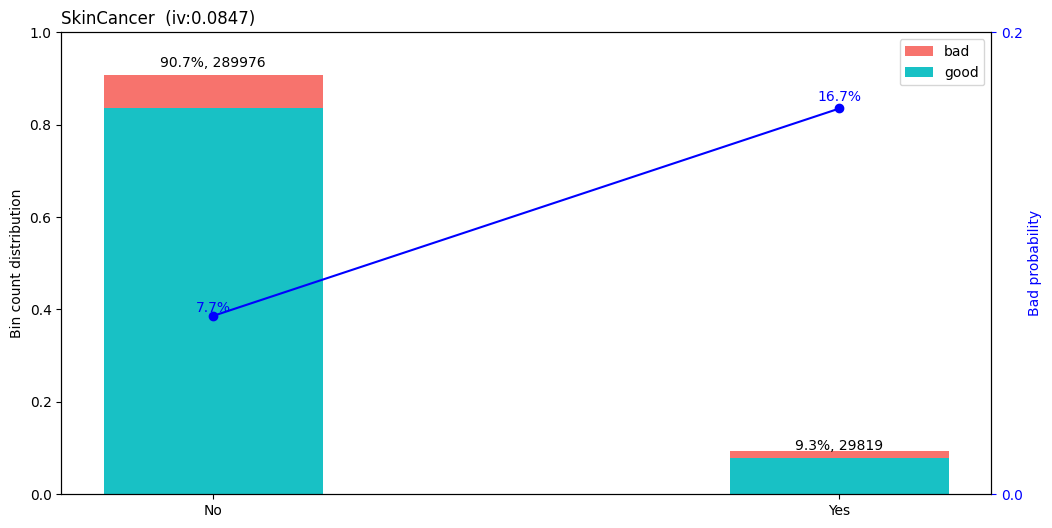

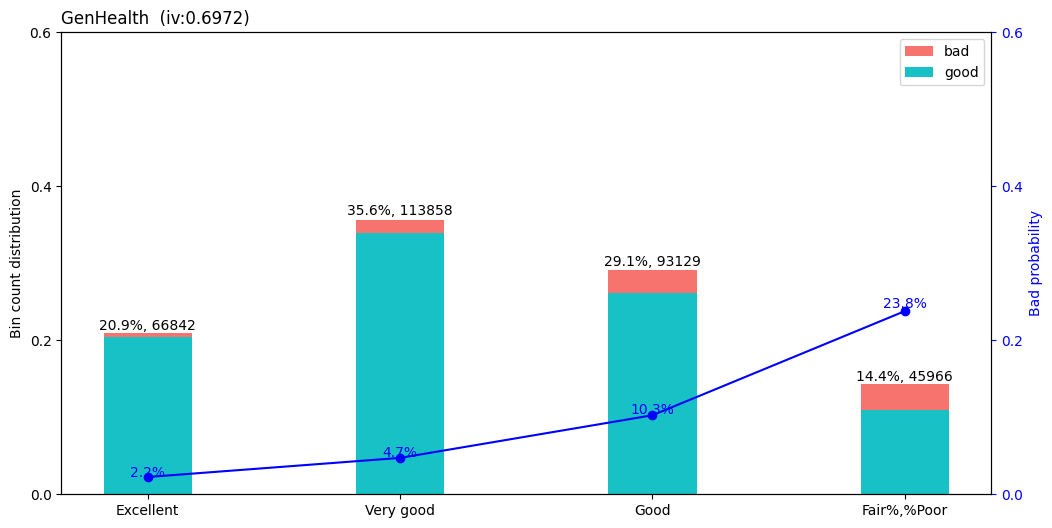

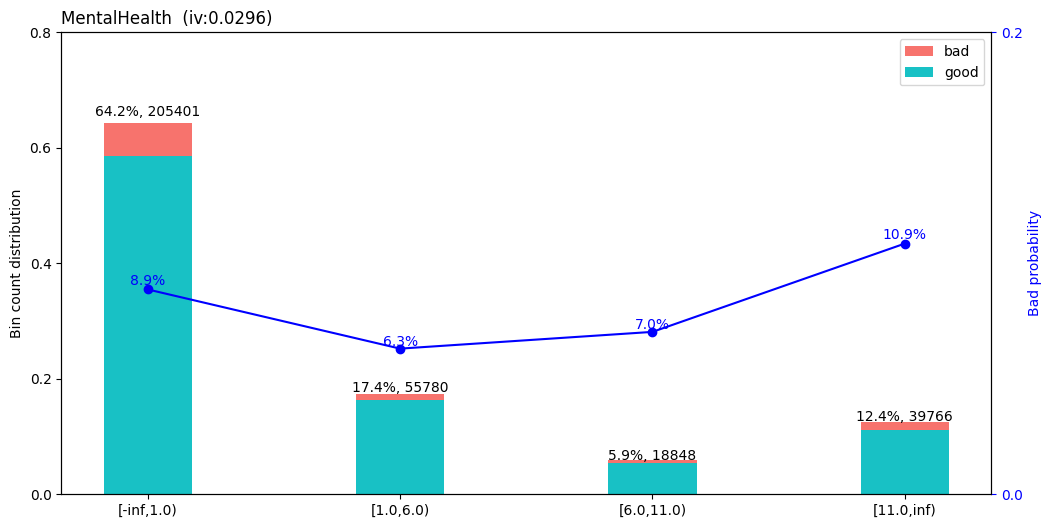

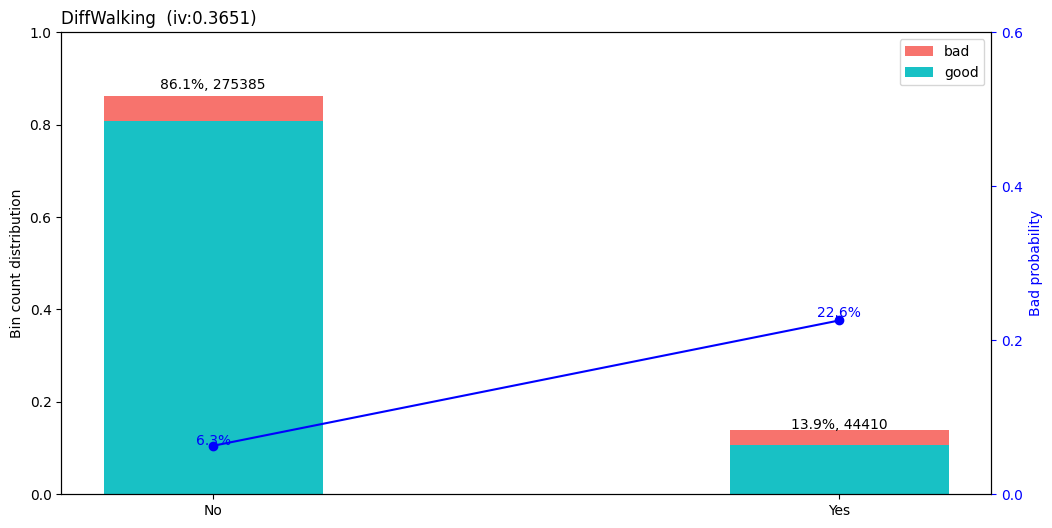

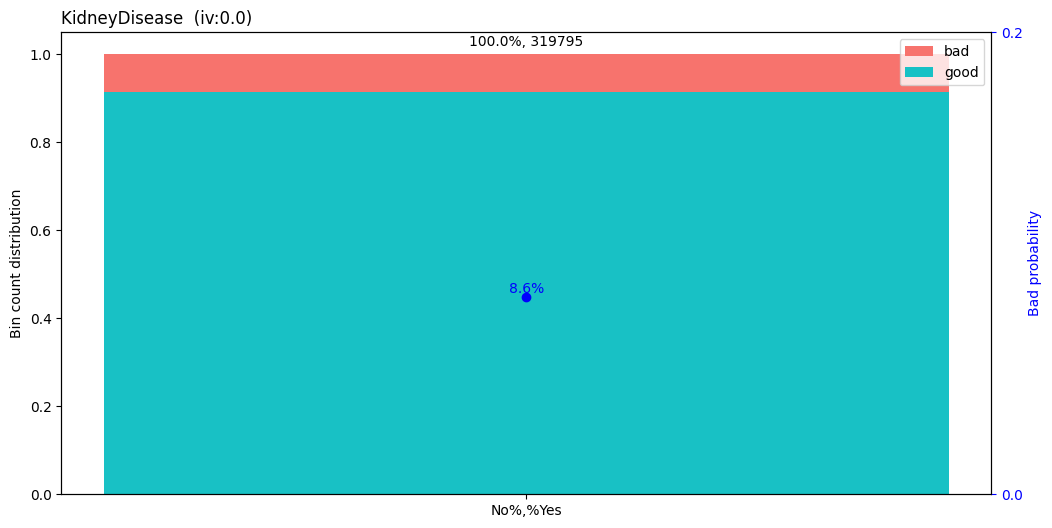

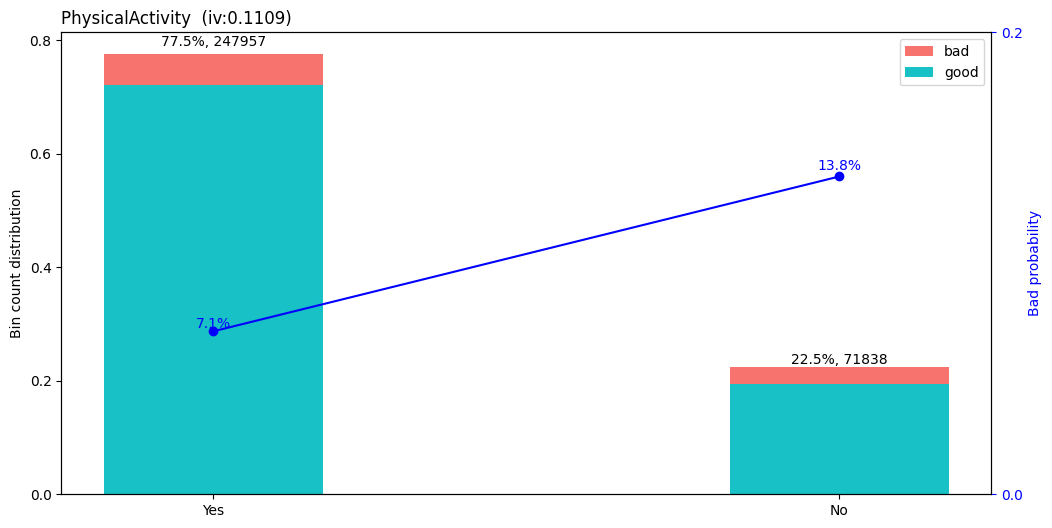

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.limits"] = [-3, 4]

sc.woebin_plot(bins)

En la variable Diabetic, se evidencia que las personas con diagnóstico de diabetes (Yes) presentan una probabilidad de enfermedad cardíaca significativamente mayor (22%) en comparación con quienes no la padecen (6.6%). Este patrón refuerza el valor predictivo de esta condición clínica, con un IV de 0.30.

En SleepTime, se observa una forma de U invertida, donde los valores extremos (dormir menos de 6 horas o más de 9) se asocian a una mayor probabilidad de enfermedad cardíaca (12%), mientras que el riesgo es menor entre quienes duermen de 7 a 8 horas (6.5%). Este hallazgo sugiere que un descanso moderado es más saludable para el corazón.

La variable AgeCategory muestra una **tendencia creciente clara**: a mayor edad, mayor es la probabilidad de presentar enfermedad cardíaca, pasando de apenas 1% en personas jóvenes a más del 18% en mayores de 70 años. Con un IV de 0.91, esta es la variable con mayor capacidad predictiva del conjunto.

En cuanto a PhysicalHealth, se observa que a medida que aumentan los días de salud física deteriorada, la probabilidad de enfermedad también aumenta significativamente, superando el 20% para quienes reportan más de 8 días en mal estado. Esto coincide con la lógica clínica y sugiere que la percepción de malestar físico es un fuerte indicador de riesgo cardiovascular.

Para GenHealth, se aprecia una relación inversa entre autoevaluación de salud y enfermedad cardíaca: quienes se perciben con salud "Excellent" tienen apenas 2.2% de probabilidad, mientras que este valor sube a 23.8% en quienes se consideran con salud "Fair" o "Poor". Finalmente, la variable DiffWalking y PhysicalActivity también muestran diferencias marcadas: la dificultad para caminar y la inactividad física están asociadas con mayores niveles de riesgo.

# Procesamiento de datos

In [ ]:
data_h2o['HeartDisease'] = data_h2o['HeartDisease'].asfactor()
for col in cat_cols:
    data_h2o[col] = data_h2o[col].asfactor()

# Modelado

In [ ]:
train, test = data_h2o.split_frame(ratios=[0.8], seed=42)

In [ ]:
train_sampled, _ = train.split_frame(ratios=[0.3], seed=42)

In [ ]:
nfolds = 5

In [ ]:
y_h2o = 'HeartDisease'
#se tomara en cuenta lo del value information
x_h2o = [
    'AgeCategory',
    'GenHealth',
    'DiffWalking',
    'Diabetic',
    'PhysicalHealth',
    'Smoking',
    'PhysicalActivity',
    'SkinCancer'
]

In [ ]:
x_h2o

['AgeCategory',
 'GenHealth',
 'DiffWalking',
 'Diabetic',
 'PhysicalHealth',
 'Smoking',
 'PhysicalActivity',
 'SkinCancer']

In [ ]:
print("Filas en train:", train.nrows)
print("Filas en test:", test.nrows)

Filas en train: 256007
Filas en test: 63788


# Random Forest

In [ ]:
hyper_params = {
    'ntrees': [50, 100],
    'max_depth': [20, 30],
    'min_rows': [2, 5]
}
rf_grid = H2OGridSearch(
    model=H2ORandomForestEstimator(
        distribution = "bernoulli",
        nfolds=nfolds,
        fold_assignment="Modulo",
        keep_cross_validation_predictions=True,
        seed=1
    ),
    hyper_params=hyper_params
)
rf_grid.train(x=x_h2o, y=y_h2o, training_frame=train_sampled)

drf Grid Build progress: |█ (cancelled)
Errors/Warnings building gridsearch model

Hyper-parameter: max_depth, 20
Hyper-parameter: min_rows, 5.0
Hyper-parameter: ntrees, 100
failure_details: Job Canceled
failure_stack_traces: water.Job$JobCancelledException: job DRF Grid Search [$03017f00000132d4ffffffff$_b01e9e57183070852b812366e40f4f2c] was cancelled
	at hex.tree.SharedTree$Driver.scoreAndBuildTrees(SharedTree.java:534)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:407)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:253)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)




H2OJobCancelled: Job<$03017f00000132d4ffffffff$_b01e9e57183070852b812366e40f4f2c> was cancelled by the user.